# `CAPSTONE 2 - SAAS SALES ANALYSIS`

## `Define Problem`

### **1.1 Background**

SaaS is an abbreviation for Software-as-a-Service. This is a software delivery/sales model in which a third-party provider hosts the application and makes it available to customers over the Internet. Customers can access the application via a browser and pay a monthly subscription for its use. AWS generates revenue from selling software subscriptions to their customers, with most of the applications they sell being sold on a monthly subscription model.

By understanding how discounts affect profitability, knowing sales trends related to product performance, and identifying the contribution of customers and product performance to sales by region, companies can make more appropriate decisions in allocating resources, adjusting marketing strategies, and increasing customer satisfaction overall. 

### **1.2 Problem Statement**

A company that provides software as a service (Software As A Service). Companies want to optimize sales strategies, increase profitability, and better understand customer needs and preferences. Therefore, companies want to recruit Data Analysts so they can gain valuable insights to help the company progress. There are several problem statements related to the analysis that will be carried out:

1. How are discounts used and their impact on company profitability?
    - Comparison of Transactions Using Discounts
    - Relationship between discount rate and profit margin, and identification of optimal point
    - The trend of providing optimal point discounts with discounts above the optimal point.
2. How can key sales trends be identified from historical data?
    - Identify sales trends and patterns from historical data.
3. How does the product perform against sales across geographic regions?
    - Identification of Product Performance on Company Profitability by Geographical Region
4. How does churn rate (the number of customers who unsubscribe) affect a company's profitability?
    - Identify churn rates in historical data.

### **1.3 Goals**

This analysis was carried out with the aim of answering the problem statement above, such as:
1. **Effect of Discounts on Profitability:** Understand the impact of discounts on company profitability to optimize pricing strategies.
2. **Sales Trends:** Identifying sales trends to understand the sales patterns and profits obtained by the company each year to improve future marketing strategies.
3. **Product performance against sales by region:** Find out if there are differences in product demand and profitability between different geographic regions.
4. **Churn Rate:** Calculates churn rate using data on the number of active customers at the beginning and end of a period, as well as the number of customers lost during that period.

In [2]:
#import library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

## `Data Understanding & Cleaning`
### **2.1 Data Understanding**

- **Overview of the Dataset**

In [4]:
# read dataset
df = pd.read_csv('Data_SaaS-Sales.csv', parse_dates=['Order Date'])
df.to_csv('Data_SaaS-Sales_Updating.csv', index=False)

# Dataset General Description
print("Dimensi dataset:", df.shape)
print("\nThe first five rows and the last five rows of the dataset")
display(df.head(), df.tail())

Dimensi dataset: (9994, 19)

The first five rows and the last five rows of the dataset


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,2023-05-05,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


- **Information Of Column**

In [5]:
# change the dtypes of the ID columns to object
kolom_ID = ['Row ID', 'Date Key', 'Customer ID']
df[kolom_ID] = df[kolom_ID].astype('object')

print("information of column:")
df.info()

information of column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   object        
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   object        
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9

Column `kategorikal` consist of:

| Column Name     | Description                                       |
|-----------------|---------------------------------------------------|
| `Row ID`        | ID for each Transaction                           |
| `Order ID`      | ID for each order.                                |
| `Order Date`    | Order date.                                       | 
| `Date Key`      | Numerical representation of the order date.       |
| `Contact Name`  | Orderer's name..                                  | 
| `Country`       | Country of origin of order.                       | 
| `City`          | City of origin of order.                          | 
| `Region`        | Region of origin of order.                        | 
| `Subregion`     | Subregion of origin of order.                     |
| `Customer`      | Name of ordering company.                         |
| `Customer ID`   | Ordering company ID.                              | 
| `Industry`      | Ordering company industry.                        |
| `Segment`       | Company/Customer industry segment                 |
| `Product`       | Ordered products.                                 |
| `License`       | Ordered product license key.                      |
  
Column `numerikal` consist of:

| Column Name     | Description                                       |
|-----------------|---------------------------------------------------| 
| `Sales`         | Sales size for this transaction.                  |
| `Quantity`      | The number of products ordered in transaction.    |
| `Discount`      | Discount given for this transaction.              |
| `Profit`        | Profit from this transaction.                     |

- This dataset consists of 9994 rows and 19 columns, where each row displays data from a software order from a buyer.

- **Addition and Subtraction of Features**

    - To facilitate the process of sorting data based on period, we create the periods `Order Year` and `Order Month` as additional features in the dataset.
    - then we drop the `Row ID` and `Date Key` columns, because these two columns do not work in this analysis

In [6]:
# Add order period columns based on year and month
orderdate_index = df.columns.get_loc('Order Date')
df.insert(orderdate_index + 1, 'Order Year', df['Order Date'].dt.year)
df.insert(orderdate_index + 2, 'Order Month', df['Order Date'].dt.month_name())
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Order Month'] = pd.Categorical(df['Order Month'], categories=months_order, ordered=True)

# drop the 'Row ID' and 'Date Key' columns
df = df.drop(columns=['Row ID','Date Key'])

df.sample(5)

,Order ID,Order Date,Order Year,Order Month,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2328,EMEA-2023-138422,2023-09-24,2023,September,Carl Ince,Russia,Nizhny Novogorod,EMEA,EU-EAST,Intel,1051,Tech,Enterprise,SaaS Connector Pack - Gold,N45TH8GYNU,14.352,3,0.2,5.2026
9618,AMER-2023-160633,2023-11-17,2023,November,Leah Murray,Mexico,Guadalajara,AMER,LATAM,Bosch,1076,Tech,Strategic,ChatBot Plugin,GXRNWM7138,86.352,3,0.2,5.3970
6228,AMER-2022-148208,2022-01-22,2022,January,David McDonald,Mexico,Tijuana,AMER,LATAM,Prudential Financial,1078,Finance,Enterprise,Site Analytics,W2TZIIG1DS,110.376,4,0.4,-20.2356
2393,APJ-2022-128111,2022-03-18,2022,March,Jacob Vaughan,South Korea,Seoul,APJ,APAC,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,IJLSQ9N82H,39.680,2,0.0,10.3168
41,APJ-2023-120999,2023-09-11,2023,September,Karen Mathis,Australia,Wollongong,APJ,ANZ,Pemex,1058,Energy,Strategic,Site Analytics,QINRKET2EK,147.168,4,0.2,16.5564


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Order Year    9994 non-null   int32         
 3   Order Month   9994 non-null   category      
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

- **Descriptive Statistics for each Column Type**

In [8]:
print("Descriptive statistics for Numerical columns and Categorical columns:")
display(df.describe(), df.describe(include='object'))

Descriptive statistics for Numerical columns and Categorical columns:


,Order Date,Order Year,Sales,Quantity,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,2021.722934,229.858001,3.789574,0.156203,28.656896
min,2020-01-04 00:00:00,2020.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,2021.000000,17.280000,2.000000,0.000000,1.728750
50%,2022-06-27 00:00:00,2022.000000,54.490000,3.000000,0.200000,8.666500
75%,2023-05-15 00:00:00,2023.000000,209.940000,5.000000,0.200000,29.364000
max,2023-12-31 00:00:00,2023.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,1.124039,623.245101,2.225110,0.206452,234.260108


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,192,2127,5191,1842,1


- **Unique Values**

In [9]:
tabelUV = pd.DataFrame({
        'column name': df.columns.values,
        'data_type': df.dtypes.values,
        'null': df.isna().mean().values * 100,
        'negative': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].unique() for col in df.columns]
        })
tabelUV

,column name,data_type,null,negative,n_unique,sample_unique
0,Order ID,object,0.0,False,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
1,Order Date,datetime64[ns],0.0,False,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 202..."
2,Order Year,int32,0.0,False,4,"[2022, 2021, 2020, 2023]"
3,Order Month,category,0.0,False,12,"['November', 'June', 'October', 'April', 'Dece..."
4,Contact Name,object,0.0,False,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,object,0.0,False,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,object,0.0,False,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,object,0.0,False,3,"[EMEA, AMER, APJ]"
8,Subregion,object,0.0,False,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,object,0.0,False,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


- **Range Of dataset**

In [10]:
# Data Datetime
print("\nRange data:")
for column in df.select_dtypes(include='datetime64').columns:
    print("\nColumn:", column)
    print("Data time range:", df[column].min(), "until", df[column].max())

for column in df.select_dtypes(include=['float', 'int']).columns:
    print("\nColumn:", column)
    print(f"Range data {column}:", df[column].min(), "until", df[column].max())


Range data:

Column: Order Date
Data time range: 2020-01-04 00:00:00 until 2023-12-31 00:00:00

Column: Order Year
Range data Order Year: 2020 until 2023

Column: Sales
Range data Sales: 0.444 until 22638.48

Column: Quantity
Range data Quantity: 1 until 14

Column: Discount
Range data Discount: 0.0 until 0.8

Column: Profit
Range data Profit: -6599.978 until 8399.976


### **2.2 Data Cleaning**
- **Check Missing dan Duplicated Values**

In [11]:
print('Missing values status:', df.isnull().values.any())
print('Duplicated Data:', df.duplicated().sum())
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / df.shape[0]) * 100
mv = missing_values.sort_values(by='Percentage', ascending=False).reset_index()
dup = df[df.duplicated(keep=False)]

display(mv, dup)

Missing values status: False
Duplicated Data: 0


,index,Total Null Values,Percentage
0,Order ID,0,0.0
1,Customer ID,0,0.0
2,Discount,0,0.0
3,Quantity,0,0.0
4,Sales,0,0.0
5,License,0,0.0
6,Product,0,0.0
7,Segment,0,0.0
8,Industry,0,0.0
9,Customer,0,0.0


,Order ID,Order Date,Order Year,Order Month,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


**RESULT :** After checking, you get data results that do not contain Missing Values ​​and Duplicated Values

- **Check Normalitas Distribusi and Data Outliers**

In [12]:
from scipy.stats import normaltest
numerical = [var for var in df.columns if df[var].dtypes in ['float64', 'int64'] and var != 'Order Period']

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df[feature_name])
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Sales,18033.308498,0.0,Not Normally Distributed
1,Quantity,2148.018022,0.0,Not Normally Distributed
2,Discount,2977.822121,0.0,Not Normally Distributed
3,Profit,14363.736244,0.0,Not Normally Distributed


In [13]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    lower_bound = round(lower_bound, 2)
    upper_bound = round(upper_bound, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df


,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,Sales,1167,11.68,-271.71,498.93
1,Quantity,170,1.70,-2.50,9.50
2,Discount,856,8.57,-0.30,0.50
3,Profit,1881,18.82,-39.72,70.82


**RESULT :** 
- After carrying out a distribution normality test, it was proven that all numerical data was NOT normally distributed
- In numerical data there are many outliers. However, because the data is still relevant, the data can still be useful for the subsequent analysis process

- **Numerical Data Correlation**

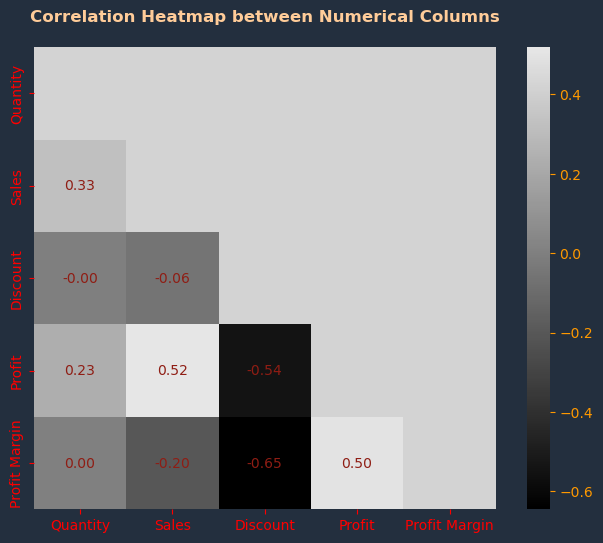

In [16]:
df_copy = df.copy()
df_copy['Profit Margin'] = (df_copy['Profit'] / df_copy['Sales']) * 100

numerical = ['Quantity', 'Sales', 'Discount', 'Profit', 'Profit Margin']

matrix = np.triu(df_copy[numerical].corr(method='spearman'))

plt.figure(figsize=(8, 6))
ax = sns.heatmap(data=df_copy[numerical].corr(method='spearman'), annot=True, fmt='.2f', cmap='gray', center=0, mask=matrix, square=True,annot_kws={'color': '#8F1D14'})
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='#FF9900')
for tick in cbar.ax.yaxis.get_ticklabels():
    tick.set_color('#FF9900')

plt.title('Correlation Heatmap between Numerical Columns\n', ha='center', fontweight='bold', color='#ffcc99')
ax.tick_params(axis='x', colors='#ff0000')
ax.tick_params(axis='y', colors='#ff0000')
ax.set_facecolor('lightgrey')
plt.gcf().set_facecolor('#232F3E')
plt.show()

**RESULT :**
The correlation test above shows that there is a measure of correlation between numerical columns, which means:
| Correlation      | Information                                          |
| ---------------- | ---------------------------------------------------- |
| `Sales` - `Quantity` | The positive correlation is moderate (0.33), indicating that the higher the sales, the more goods are sold |
| `Sales` - `Discount` | Correlation is close to zero (-0.06), there is no clear linear relationship between sales and disco |
| `Sales` - `Profit` | Strong positive correlation (0.52), the higher the sales, the greater the profits |
| `Sales` - `Profit Margin` | The negative correlation is weak (-0.2), indicating that an increase in profit margin tends to be correlated with a decrease in sales, and vice versa, but this relationship is not strong |
| `Quantity` - `Profit` | Low positive correlation (0.23), the more goods sold, the greater the profit |
| `Quantity` - `Discount` | Correlation is close to zero (-0.00), there is no linear relationship between the number of items sold and discounts |
| `Quantity` - `Profit Margin` | The correlation is very weak (0.0), indicating there is no linear relationship between profit margin and number of sales |
| `Discount` - `Profit Margin` | The negative correlation is moderate (-0.65), the lower the discount given, and vice versa |
| `Discount` - `Profit` | Strong negative correlation (-0.54), the bigger the discount, the smaller the profit, and vice versa |
| `Profit` - `Profit Margin` | Medium positive correlation (0.5), the higher the profit margin, the higher the profits obtained |

**Save Updating Data**

In [17]:
df.to_csv('Data_SaaS-Sales_Updating.csv', index=False)

## `Exploratory Data Analysis (EDA)`

In EDA, we will analyze the problems found in SaaS Sales from several aspects, namely:
1. **Effect of Discounts on Profitability**
2. **Sales Trends and Product Performance**
3. **Product Performance in Sales Based on Region** 
4. **Churn Rate**

### **3.1 `How are discounts used and their impact on company profitability?`**

#### **a. Comparison of Transactions Using Discounts**

In [18]:
transactions_with_discount = df[df['Discount'] > 0]
transactions_without_discount = df[df['Discount'] == 0]

num_transactions_with_discount = len(transactions_with_discount)
num_transactions_without_discount = len(transactions_without_discount)
median_profit_with_discount = transactions_with_discount['Profit'].median()
median_profit_without_discount = transactions_without_discount['Profit'].median()

data = {
    'Type of Transaction': ['With Discount', 'Without Discount'],
    'Number of Transactions': [num_transactions_with_discount, num_transactions_without_discount],
    'Median Profit': [round(median_profit_with_discount, 2), round(median_profit_without_discount, 2)]
}

df_discount = pd.DataFrame(data)
df_discount

,Type of Transaction,Number of Transactions,Median Profit
0,With Discount,5196,3.34
1,Without Discount,4798,16.00


**INSIGHT**

- **Number of Transactions**: There are 5196 transactions with discounts and 4798 transactions without discounts. The number of transactions with discounts is higher than transactions without discounts.
- **Median Profit**: Median profit from transactions without discounts (16.00) is much higher than transactions with discounts (3.34). This shows that even though the number of transactions with discounts is higher, the profitability per transaction without discounts tends to be higher.

#### **b. Identify Optimal Discount Points**

Identify the optimal point in providing discounts to increase profitability without sacrificing significant profit margins

In [19]:
order_by_discount = df.groupby('Discount')['Order ID'].count().sort_values(ascending=False)
sales_by_discount = df.groupby('Discount')['Sales'].sum().round(2).sort_values(ascending=False)
profit_by_discount = df.groupby('Discount')['Profit'].sum().round(2).sort_values(ascending=False)
pm_by_discount = ((profit_by_discount / sales_by_discount) * 100).round(2).sort_values(ascending=False)

discount_analysis = pd.DataFrame({
    'Number of Transaction': order_by_discount,
    'Sales': sales_by_discount,
    'Profit': profit_by_discount,
    'Profit Margin (%)': pm_by_discount
})

display(discount_analysis)

,Number of Transaction,Sales,Profit,Profit Margin (%)
Discount,,,,
0.00,4798,1087908.47,320987.60,29.51
0.10,94,54369.35,9029.18,16.61
0.15,52,27558.52,1418.99,5.15
0.20,3657,764594.37,90337.31,11.82
0.30,227,103226.66,-10369.28,-10.05
0.32,27,14493.46,-2391.14,-16.50
0.40,206,116417.78,-23057.05,-19.81
0.45,11,5484.97,-2493.11,-45.45
0.50,66,58918.54,-20506.43,-34.80


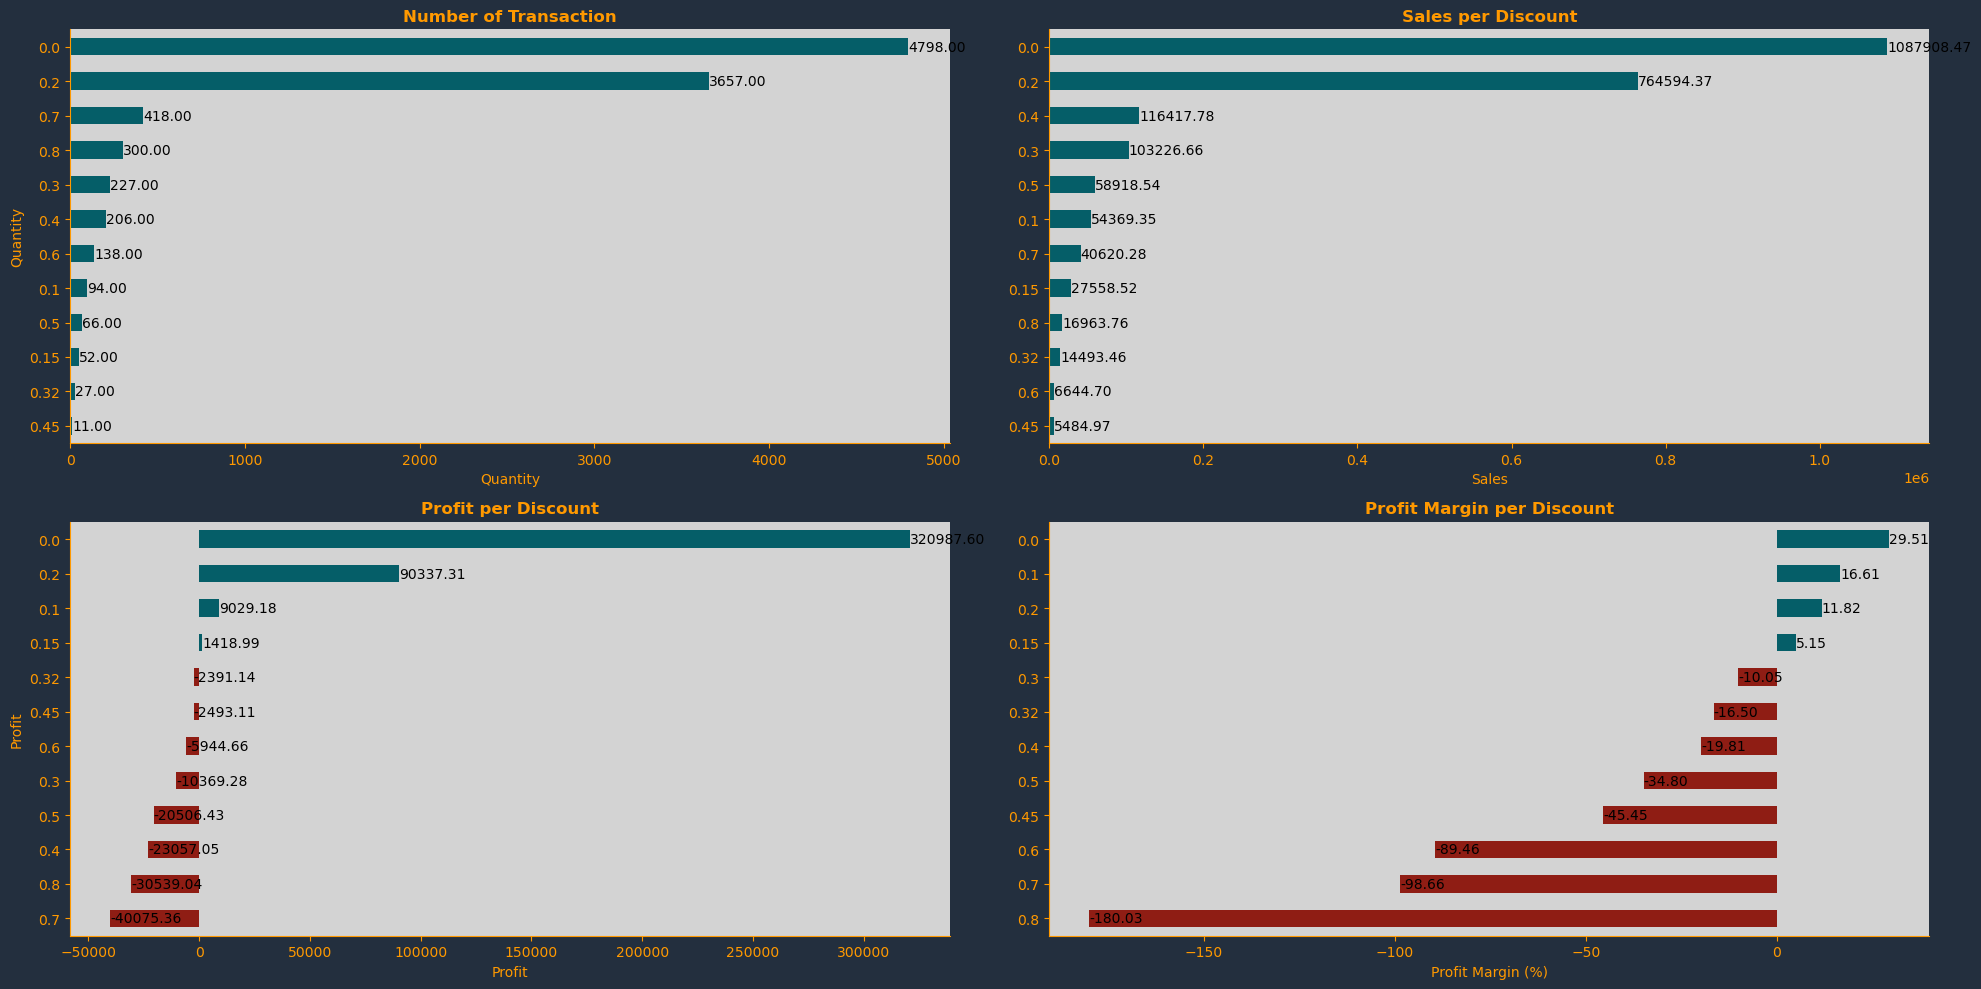

In [20]:
def plot_barh(plots, figsize=(18, 12)):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    for i, (data, title, xlabel) in enumerate(plots):
        row = i // 2
        col = i % 2  

        # Determines color based on positive or negative values
        color = ['#055E68' if val >= 0 else '#8F1D14' for val in data]

        data.plot(kind='barh', ax=axs[row, col], color=color)
        axs[row, col].set_title(title, fontweight='bold', color='#FF9900')
        axs[row, col].set_xlabel(xlabel, color='#FF9900')
        axs[row, col].set_ylabel(xlabel, color='#FF9900')
        axs[row, col].tick_params(axis='x', colors='#FF9900')
        axs[row, col].tick_params(axis='y', colors='#FF9900')
        axs[row, col].invert_yaxis()
        axs[row, col].set_facecolor('lightgrey')

        if col > 0:
            axs[row, col].set_ylabel(None)

        for j, v in enumerate(data):
            axs[row, col].text(v, j, f'{v:.2f}', va='center')

        axs[row, col].spines[['bottom','left']].set_color('#FF9900')
        axs[row, col].spines[['top','right']].set_visible(False)
    
        
    fig.patch.set_facecolor('#232F3E')
    plt.tight_layout()
    plt.show()

plots = [
    (order_by_discount, 'Number of Transaction', 'Quantity'),
    (sales_by_discount, 'Sales per Discount', 'Sales'),
    (profit_by_discount, 'Profit per Discount', 'Profit'),
    (pm_by_discount, 'Profit Margin per Discount', 'Profit Margin (%)')
]

plot_barh(plots, figsize=(20, 10))

In [21]:
df[df['Discount']<=0.2]['Order ID'].count(), df[df['Discount']>0.2]['Order ID'].count()

(8601, 1393)

**INSIGHT**
    
- Of the total transactions (9994) the company only gave discounts of more than 20% to 1391 transactions (14% of total transactions), which means that the company's strategy in providing discounts is good enough to continue to generate profitability
- Sales increase as the discount level increases until they reach a 20% discount, but then decrease significantly when the discount is increased further.
- Profit increases at low discount levels (10% and 20%), but starts to experience losses at higher discounts (30% - 80%). This suggests a trade-off between increased sales and reduced profitability when discounts are increased.
- Profit margin decreased significantly as the discount rate increased. This shows that higher discounts have a negative impact on company profitability. Discounts at very high levels (e.g., 70%, 80%) can have a negative impact on a company's profitability. Therefore, companies need to be careful in determining discount strategies so as not to reduce profits significantly.
- Companies need to pay attention to the optimal point in providing discounts. Giving too many discounts can hurt a company's profitability, while too few discounts can reduce sales appeal. Further analysis is needed to determine the optimal point for providing discounts.

   This analysis shows that giving discounts can have a significant impact on company profitability if the discount figure is above the optimal point, the optimal discount point is <= 20% as a safe discount figure so that the resulting profit margin remains positive, with a discount Larger ones have risks that result in reduced profit margins or even losses. By understanding discount patterns and their impact on profitability, companies can optimize pricing and discount strategies to achieve a good balance between increased sales and profitability.

### **3.2 `How can sales trends be identified from company historical data?`**

#### **a. Analysis of Sales and Profit Trends per Year**

In [22]:
yearly_sales_profit = df.groupby(df['Order Year']).agg({'Sales':'sum', 'Profit':'sum'}).round(2)

display(yearly_sales_profit)

,Sales,Profit
Order Year,,
2020,484247.50,49543.97
2021,470532.51,61618.60
2022,608473.83,81726.93
2023,733947.02,93507.51


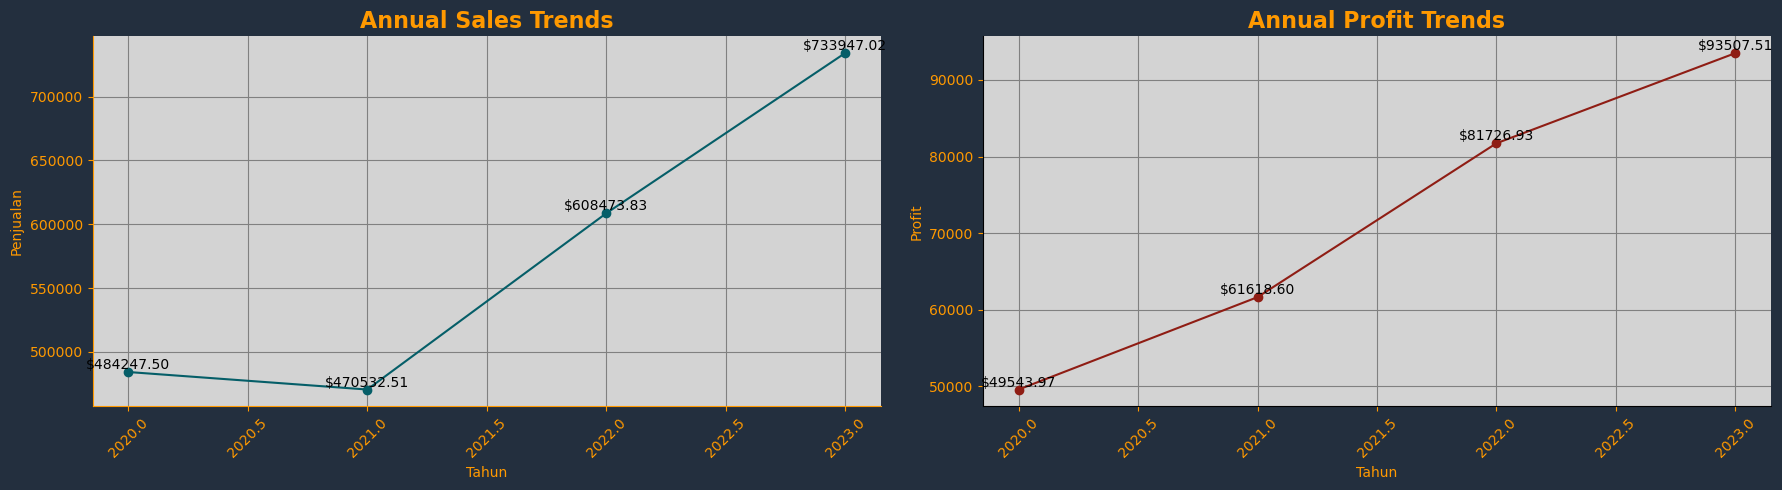

In [23]:
yearly_sales_profit = df.groupby(df['Order Year']).agg({'Sales':'sum', 'Profit':'sum'})

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

axs[0].plot(yearly_sales_profit.index, yearly_sales_profit['Sales'], marker='o', color='#055E68')
axs[0].set_title('Annual Sales Trends', fontsize=16, fontweight='bold', color='#FF9900')
axs[0].set_xlabel('Tahun', color='#FF9900' )
axs[0].set_ylabel('Penjualan', color='#FF9900')
axs[0].tick_params(axis='x', rotation=45, colors='#FF9900')
axs[0].tick_params(axis='y', colors='#FF9900')
axs[0].spines[['bottom','left']].set_color('#FF9900')
axs[0].spines[['top','right']].set_visible(False)
axs[0].grid(True, color='grey')
axs[0].set_facecolor('lightgrey')

for i, sales in enumerate(yearly_sales_profit['Sales']):
    axs[0].text(yearly_sales_profit.index[i], sales, f'${sales:.2f}', ha='center', va='bottom')

axs[1].plot(yearly_sales_profit.index, yearly_sales_profit['Profit'], marker='o', color='#8F1D14')
axs[1].set_title('Annual Profit Trends', fontsize=16, fontweight='bold', color='#FF9900')
axs[1].set_xlabel('Tahun', color='#FF9900')
axs[1].set_ylabel('Profit', color='#FF9900')
axs[1].tick_params(axis='x', rotation=45, colors='#FF9900')
axs[1].tick_params(axis='y', colors='#FF9900')
axs[1].spines[['top','right']].set_visible(False)
axs[1].grid(True, color='grey')
axs[1].set_facecolor('lightgrey')

for i, profit in enumerate(yearly_sales_profit['Profit']):
    axs[1].text(yearly_sales_profit.index[i], profit, f'${profit:.2f}', ha='center', va='bottom')

fig.patch.set_facecolor('#232F3E')
plt.tight_layout()
plt.show()

**Significance Test**

In [24]:
import matplotlib.pyplot as plt 
from scipy.stats import kruskal

yearly_sales = df.groupby(df['Order Year'])['Sales'].median()
yearly_profit = df.groupby(df['Order Year'])['Profit'].median()
yearly_profitmargin = ((yearly_profit / yearly_sales)*100).round(2) 

stats_sales, p_value_sales = kruskal(*[group for name, group in yearly_sales.groupby(level=0)])
stats_profit, p_value_profit = kruskal(*[group for name, group in yearly_profit.groupby(level=0)])

print("Kruskal-Wallis Test Results for Annual Sales:")
print(f"Statistik Uji: {stats_sales}")
print(f"P-Value: {p_value_sales}")
if p_value_sales < 0.05:
    print("There are significant differences in sales between years.")
else:
    print("There are no significant differences in sales between years.")
print()

print("Kruskal-Wallis Test Results for Annual Profit:")
print(f"Test Statistics: {stats_profit}")
print(f"P-Value: {p_value_profit}")
if p_value_profit < 0.05:
    print("There are significant differences in profits between years.")
else:
    print("There are No significant differences in profits between years.")


Kruskal-Wallis Test Results for Annual Sales:
Statistik Uji: 3.0
P-Value: 0.3916251762710877
There are no significant differences in sales between years.

Kruskal-Wallis Test Results for Annual Profit:
Test Statistics: 3.0
P-Value: 0.3916251762710877
There are No significant differences in profits between years.


**INSIGHT**

- Both graphs show an increase every year, although the sales trend saw a slight decline in 2020-2021,
- In the 2020-2021 annual sales trend, there was a decline, assuming that at that time the Covid 19 phenomenon was occurring which had an impact on the company, such as: 
    - some organizations may delay spending on new technology or software updates due to the economic uncertainty caused by the pandemic.
    - Some industries, such as hospitality, tourism and brick-and-mortar retail, are experiencing reduced demand for software solutions due to reduced business activity.
- There is no decline in the annual profit trend, proving that in 2021 the company will continue to generate high profits with lower sales than the previous year (2020).
- In 2020-2021 there was a decline in sales which was not too significant, proven by the significance test that there were no significant differences in sales or profits between years

### **b. Analysis of Sales and Profit Trends per Month**

In [25]:
yearly_monthly_data = df.groupby(['Order Year', 'Order Month'], observed=True).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Pivot tables to organize data into the desired format
pivot_table_sales = yearly_monthly_data.pivot(index='Order Month', columns='Order Year', values='Sales').apply(lambda x:x.map('{:.2f}'.format))
pivot_table_profit = yearly_monthly_data.pivot(index='Order Month', columns='Order Year', values='Profit').apply(lambda x:x.map('{:.2f}'.format))

combined_table = pd.concat([pivot_table_sales, pivot_table_profit], axis=1, keys=['Sales', 'Profit'])
combined_table

Sales                                  Profit            \
Order Year       2020      2021      2022       2023     2020      2021   
Order Month                                                               
January      13946.23  18174.08  18542.49   44703.14  2446.77  -3281.01   
February      4810.56  11951.41  22867.71   20283.51   865.73   2813.85   
March        55691.01  38726.25  51186.22   53908.96   498.73   9732.10   
April        28295.35  34195.21  39248.59   40112.42  3488.84   4187.50   
May          23648.29  30131.69  56691.08   45651.24  2738.71   4667.87   
June         34595.13  24797.29  39430.44   48259.75  4976.52   3335.56   
July         33946.39  28765.33  38440.75   48428.36  -841.48   3288.65   
August       27909.47  36898.33  33265.56   61516.09  5318.10   5355.81   
September    81777.35  64595.92  72908.11   90488.72  8328.10   8209.16   
October      31453.39  31404.92  56463.13   77793.76  3448.26   2817.37   
November     78628.72  75972.56  82192.32  112326.47  9292.13  12474.79   
December     69545.62  74919.52  97237.42   90474.60  8983.57   8016.97   

                                 
Order Year       2022      2023  
Order Month                      
January       2824.82   7208.68  
February      4996.25   1605.65  
March         3625.27  12957.90  
April         2957.84   2803.63  
May           8627.48   6274.46  
June          4499.58   8087.67  
July          4464.66   6623.56  
August        2328.35   8894.45  
September     9360.49  11395.44  
October      15763.38   9440.66  
November      4376.07   9682.55  
December     17902.73   8532.87

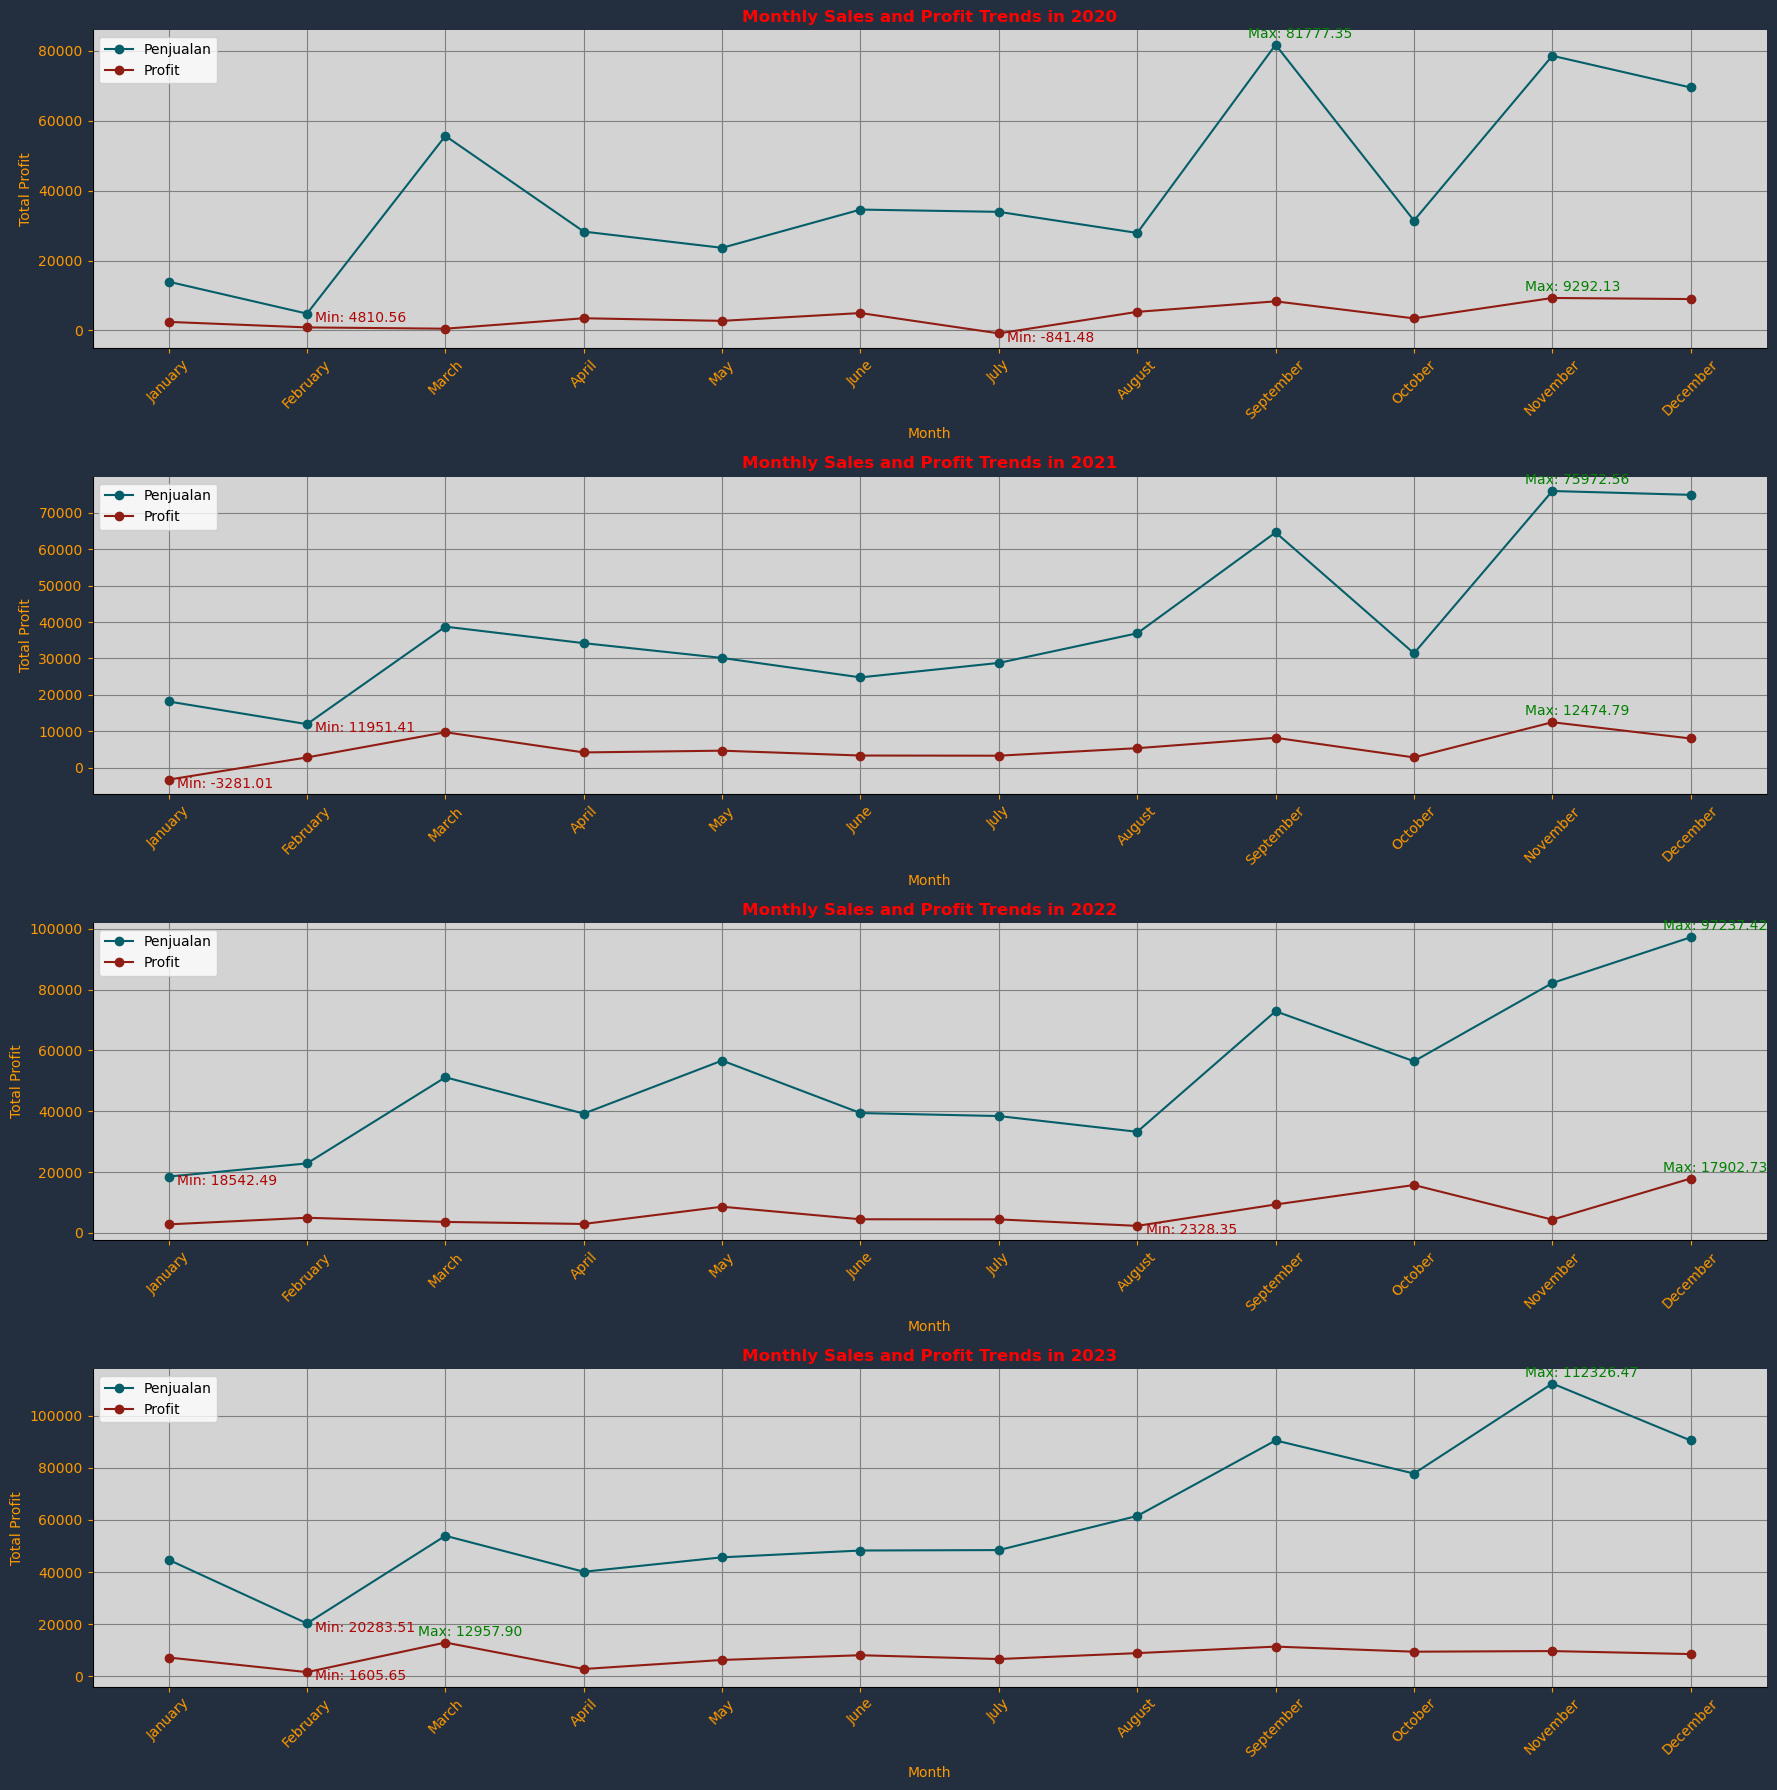

In [27]:
def annotate_max_min(ax, data, xcol, ycol):
    max_data = data.loc[data[ycol].idxmax()]
    min_data = data.loc[data[ycol].idxmin()]
    ax.annotate(f'Max: {max_data[ycol]:.2f}', xy=(max_data[xcol], max_data[ycol]), xytext=(-20, 5), textcoords='offset points', color='green')
    ax.annotate(f'Min: {min_data[ycol]:.2f}', xy=(min_data[xcol], min_data[ycol]), xytext=(6, -6), textcoords='offset points',color='#AF0404')

yearly_monthly_data = df.groupby(['Order Year', 'Order Month'], observed=True).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(18, 18))


for i, year in enumerate(range(2020, 2024)):
    yearly_data = yearly_monthly_data[yearly_monthly_data['Order Year'] == year]

    axs[i].plot(yearly_data['Order Month'], yearly_data['Sales'], marker='o', color='#055E68', label='Penjualan')
    axs[i].set_title(f'Monthly Sales and Profit Trends in {year}', fontsize=12, fontweight='bold', color='#ff0000')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Total Sales')
    axs[i].set_xticks(yearly_data['Order Month'])
    axs[i].tick_params(axis='x', rotation=45, colors='#FF9900')
    axs[i].tick_params(axis='y', colors='#FF9900')
    axs[i].grid(True, color='grey')
    axs[i].legend()
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    annotate_max_min(axs[i], yearly_data, 'Order Month', 'Sales')

    axs[i].plot(yearly_data['Order Month'], yearly_data['Profit'], marker='o', color='#8F1D14', label='Profit')
    axs[i].set_xlabel('Month',color='#FF9900')
    axs[i].set_ylabel('Total Profit',color='#FF9900')
    axs[i].tick_params(axis='x', rotation=45, colors='#FF9900')
    axs[i].tick_params(axis='y', colors='#FF9900')
    axs[i].legend()
    axs[i].set_facecolor('lightgrey')
    annotate_max_min(axs[i], yearly_data, 'Order Month', 'Profit')

fig.patch.set_facecolor('#232F3E')
plt.tight_layout()
plt.show()

**INSIGHT**

- Sales and profit trends tend to fluctuate every month from year to year.
- **Sales Trends**: Seen consistent increases from 2020 to 2023, with January 2023 sales reaching an all-time high. There is a pattern in the sales graph, every month March, September and November there is always a significant increase each year. Meanwhile, every April and October there is a decline each year.
- **Profit Trend**: Although there are monthly fluctuations, profits have also increased quite significantly from year to year, indicating that the company has succeeded in increasing its profitability over time.
- **Correlation between Sales and Profit**: It can be seen that an increase in monthly sales is usually followed by an increase in profit, but this is not always the case. For example, although sales in November 2023 increased significantly, profits only increased slightly compared to the previous year.
- **Seasonal Influence**: There is a clear seasonal pattern in the data, with increases in sales and profits especially occurring in certain months, such as November and December, which may be related to holidays and year-end celebrations.

### **3.3 `How does the product perform against sales across geographic regions?`**


#### **Identify the Region's Contribution to Company Profitability**

In [28]:
product_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
product_sales = df.groupby('Product')['Sales'].sum().round(2).sort_values(ascending=False)
product_profit = df.groupby('Product')['Profit'].sum().round(2).sort_values(ascending=False)
product_profitmargin = ((product_profit / product_sales) * 100).round(2).sort_values(ascending=False)

contribution = pd.DataFrame({
    'Total Quantity': product_quantity,
    'Sales': product_sales,
    'Profit': product_profit,
    'Profit Margin (%)': product_profitmargin
})

contribution

,Total Quantity,Sales,Profit,Profit Margin (%)
Product,,,,
Alchemy,234,149528.03,55617.82,37.20
Big Ol Database,440,189238.63,3384.76,1.79
ChatBot Plugin,3000,27118.79,6527.79,24.07
ContactMatcher,7215,410378.26,12496.28,3.05
Data Smasher,2976,167380.32,41936.64,25.05
FinanceHub,3756,340935.42,32136.42,9.43
Marketing Suite,868,114880.00,-3472.56,-3.02
Marketing Suite - Gold,3158,223843.61,21278.83,9.51
OneView,1729,107532.16,18138.01,16.87


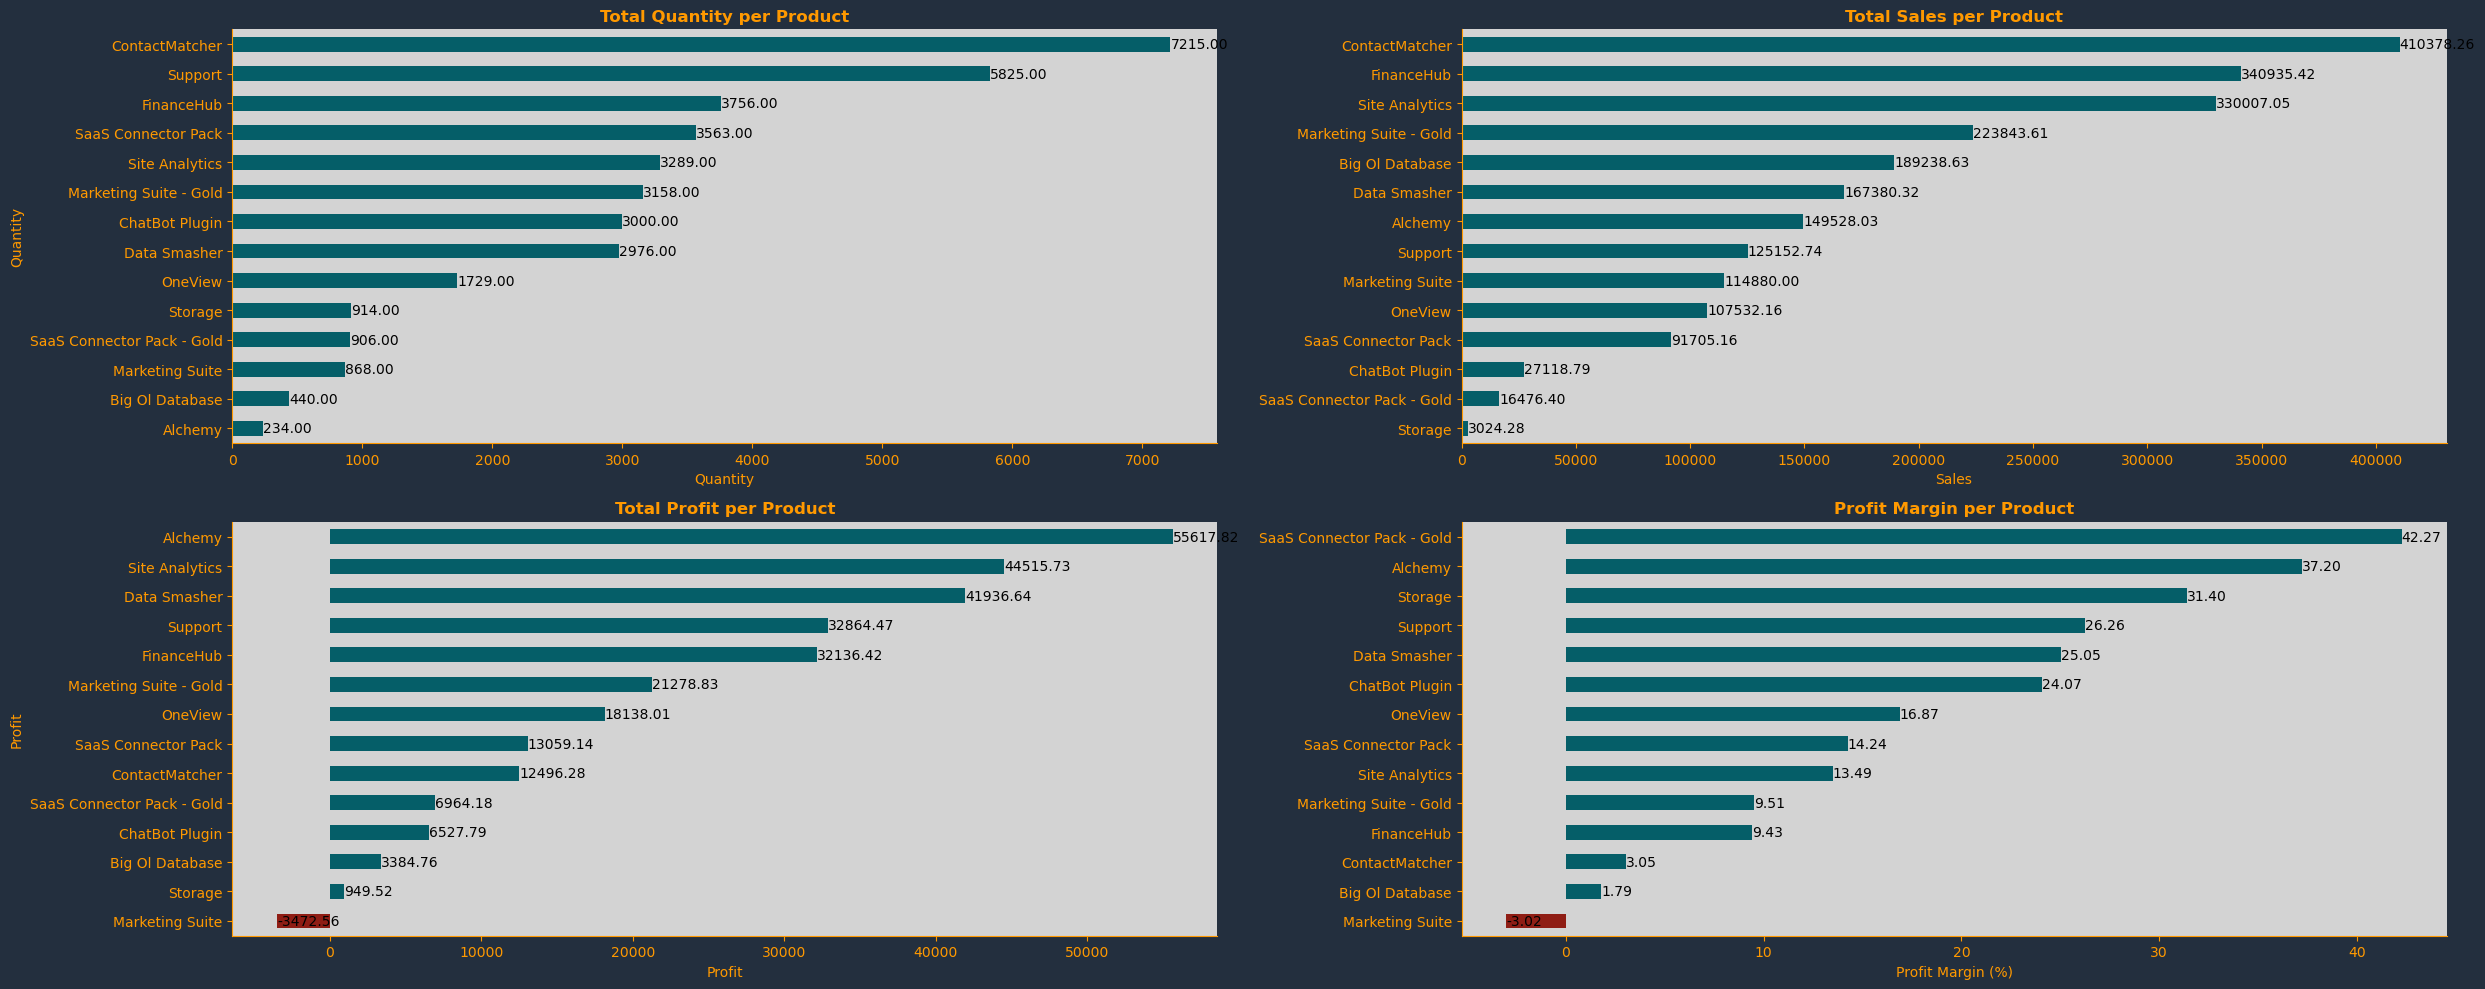

In [29]:
plots = [
    (product_quantity, 'Total Quantity per Product', 'Quantity'),
    (product_sales, 'Total Sales per Product', 'Sales'),
    (product_profit, 'Total Profit per Product', 'Profit'),
    (product_profitmargin, 'Profit Margin per Product', 'Profit Margin (%)')
]

plot_barh(plots, figsize=(25, 10))

**INSIGHT**

From the contribution results displayed, it shows that:

**Top 3 Quantity Sales:**                                                               
- `ContactMatcher` Products: 7215.                                                        
- Product `Support`: 5825.                                                                          
- `FinanceHub` Products: 3756.

**Top 3 Sales:**
- The `ContactMatcher` product accounted for $410,378
- The `FinanceHub` product contributed $340,935
- The `Site Analytics` product accounted for $330,007

**Top 3 Profits:**
- The product `Alchemy` generated profits of $55,617 from total sales.
- The `Site Analytics` product generated a profit of $44,515 from total sales.
- The `Data Smasher` product generated a profit of $41,936 from total sales.

**Top 3 Profit Margins**
- Product `SaaS Connector Pack - Gold` (42.27%) 
- `Alchemy` Products (37.20%)
- `Storage` Products (31.40%)

**INSIGHT**

- The ContactMatcher product is the product with the highest quantity sold (7215). This shows that ContactMatcher products have a high level of demand from customers.
- Even though ContactMatcher has the largest number of orders. This shows that ContactMatcher has a high sales value, because the number of Quantities/Orders for this product is very large.
- Most products have profit margins above 10%, which shows that overall, these products are quite efficient in generating profits relative to their sales.
- However, Marketing Suite is the only product that has a negative profit margin value (-3.02%), while its sales contribution is positive. This suggests that there are certain products that may need to be further evaluated to improve their efficiency and profitability.

In [30]:
region_sales_profit = df.groupby('Region').agg(
    Quantity=pd.NamedAgg(column='Quantity', aggfunc='sum'),
    Sales=pd.NamedAgg(column='Sales', aggfunc='sum'),
    Profit=pd.NamedAgg(column='Profit', aggfunc='sum')
).round(2)

region_sales_profit['Profit Margin'] = ((region_sales_profit['Profit'] / region_sales_profit['Sales']) * 100).round(2)

display(region_sales_profit)

,Quantity,Sales,Profit,Profit Margin
Region,,,,
AMER,13879,837849.60,127426.99,15.21
APJ,7961,415464.24,11513.99,2.77
EMEA,16033,1043887.02,147456.05,14.13


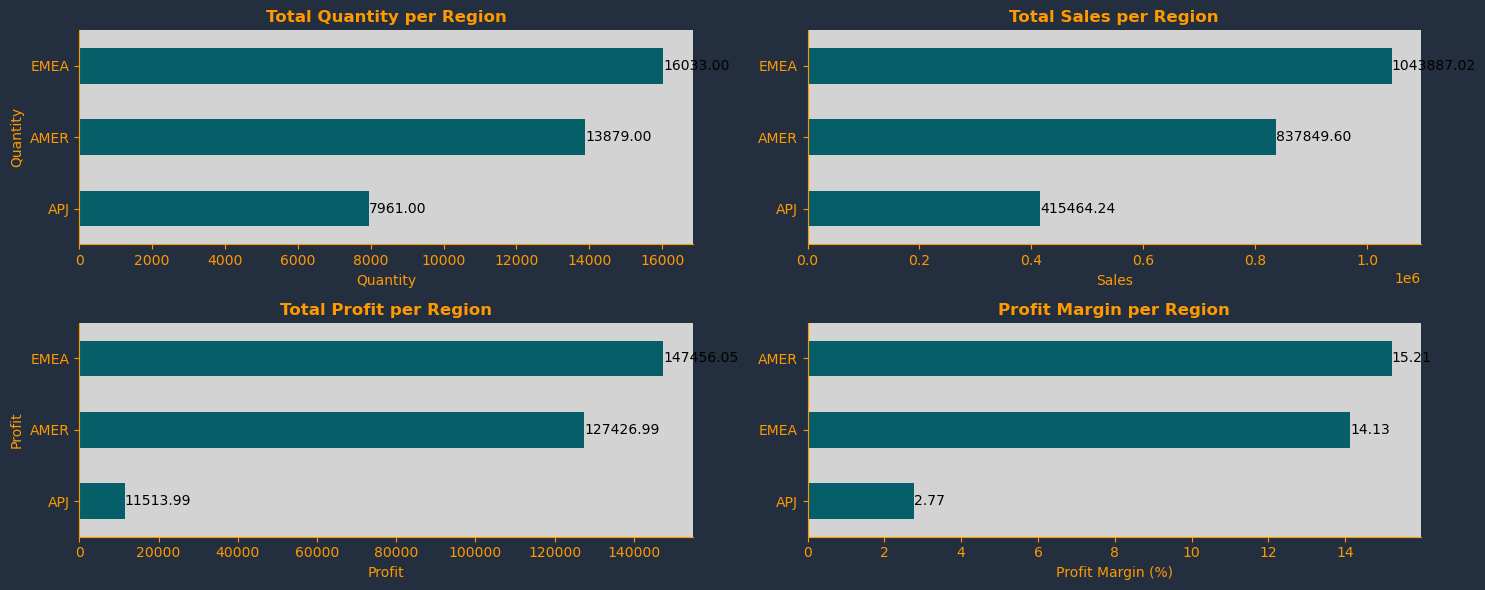

In [31]:
region_quantity = df.groupby('Region')['Quantity'].sum().sort_values(ascending=False)
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profitmargin = ((region_profit / region_sales)*100).round(2).sort_values(ascending=False)

plots = [
    (region_quantity, 'Total Quantity per Region', 'Quantity'),
    (region_sales, 'Total Sales per Region', 'Sales'),
    (region_profit, 'Total Profit per Region', 'Profit'),
    (region_profitmargin, 'Profit Margin per Region', 'Profit Margin (%)')
]

plot_barh(plots, figsize=(15, 6))

**INSIGHT**

1. **`AMER` (America)**:
    - Despite having the highest number of sales, with total sales reaching $837,849.60, AMER shows a fairly low profit margin, only 15.21%.
    - This suggests that despite high sales volumes, operational efficiency or pricing strategy may need to be examined further to improve profitability.

2. **`APJ` (Asia Pacific and Japan)**:
    - `APJ` had a very low profit margin of only 2.77%, despite sales of $415,464.24.
    - This shows that there is potential for improving operational efficiency and adjusting pricing strategies to better suit the market in the region.

3. **`EMEA` (Europe, Middle East and Africa)**:
    - `EMEA` showed a relatively healthy profit margin of 14.13%, with total sales reaching $1,043,887.02.
    - Nonetheless, there is potential to continue improving profitability by optimizing operational efficiency and pricing strategy.

    For this analysis shows that even though the company's region has the highest sales in the `AMER` region, the company still needs to improve its profit margin in that region. On the other hand, sales in the `APJ` region require special attention to increase its profitability, while the `EMEA` region shows an excellent contribution.

In [32]:
product_per_region = df.groupby(['Region', 'Product']).agg({'Quantity':'sum','Sales': 'sum', 'Profit': 'sum'}).round(2)
product_per_region['Profit Margin (%)'] = ((product_per_region['Profit'] / product_per_region['Sales']) * 100).round(2)
top3qty_region = product_per_region.groupby('Region', group_keys=False).apply(lambda x: x.nlargest(3, 'Quantity'))
top3profmarg_region = product_per_region.groupby('Region', group_keys=False).apply(lambda x: x.nlargest(3, 'Profit Margin (%)'))

qty = top3qty_region['Quantity'].to_frame()
profmarg = top3profmarg_region['Profit Margin (%)'].to_frame()

display(qty, profmarg)

Quantity
Region Product                 
AMER   ContactMatcher      2661
       Support             2070
       FinanceHub          1350
APJ    ContactMatcher      1540
       Support             1293
       FinanceHub           767
EMEA   ContactMatcher      3014
       Support             2462
       FinanceHub          1639

Profit Margin (%)
Region Product                                      
AMER   SaaS Connector Pack - Gold              45.37
       Alchemy                                 36.68
       Storage                                 31.00
APJ    Alchemy                                 42.67
       SaaS Connector Pack - Gold              38.67
       Storage                                 27.92
EMEA   SaaS Connector Pack - Gold              42.44
       Storage                                 33.80
       Alchemy                                 33.70

**Top 3 Most Needed per Region**
- **AMER**:	
    - `ContactMatcher`	(2661)
    - `Support` (2070)
    - `FinanceHub` (1350)
- **APJ**	
    - `ContactMatcher`(1540)
    - `Support`(1293)
    - `FinanceHub`	(767)
- **EMEA**:	
    - `ContactMatcher` (3014)
    - `Support`	(2462)
    - `FinanceHub` (1639)

**Top 3 Profit Margin per Region**
- **AMER**:
    - `SaaS Connector Pack - Gold` (42.27%) 
    - `Alchemy` (36.68%) 
    - `Storage` (31.00%) 
- **APJ**:
    - `Alchemy` (42.67%) 
    - `SaaS Connector Pack - Gold` (38.67%) 
    - `Storage` (27.92%) 
- **EMEA**:
    - `SaaS Connector Pack - Gold` (42.44%) 
    - `Storage` (33.80%) 
    - `Alchemy` (33.70%) 

**INSIGHT**

- ContactMatcher, Support, and FinanceHub products are the most popular products in each region (AMER, APJ, and EMEA) based on the number of orders. This may indicate that these products are in high demand or provide significant benefits to customers in that region.
- Products with the highest profit margins vary by region. However, SaaS Connector Pack - Gold was the product with the highest profit margin in two of the three regions (AMER and EMEA), while Alchemy had the highest profit margin in the APJ region.
- From the insight above, companies can provide market strategies for the products most needed per region with products that have the most profitable profit margins

### **3.4 `How does churn rate (the number of customers who unsubscribe) affect a company's profitability?`**

 #### **Identify churn rates in historical data**

In [33]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Define the current analysis date as the latest order date in the dataset
current_date = df['Order Date'].max()

# Determine the last purchase date for each customer
last_purchase = df.groupby('Customer ID')['Order Date'].max().reset_index()
last_purchase.columns = ['Customer ID', 'Last Purchase Date']

# Define churn: customers with last purchase date older than 12 months from current date
churn_threshold = current_date - pd.DateOffset(months=12)
last_purchase['Churned'] = last_purchase['Last Purchase Date'] < churn_threshold

# Calculate churn rate
total_customers = last_purchase.shape[0]
churned_customers = last_purchase['Churned'].sum()
churn_rate = (churned_customers / total_customers) * 100

# Display the churn analysis results
last_purchase.head(), churn_rate


(   Customer ID Last Purchase Date  Churned
 0         1001         2023-12-19    False
 1         1002         2023-12-10    False
 2         1003         2023-12-30    False
 3         1004         2023-12-18    False
 4         1005         2023-12-24    False,
 0.0)

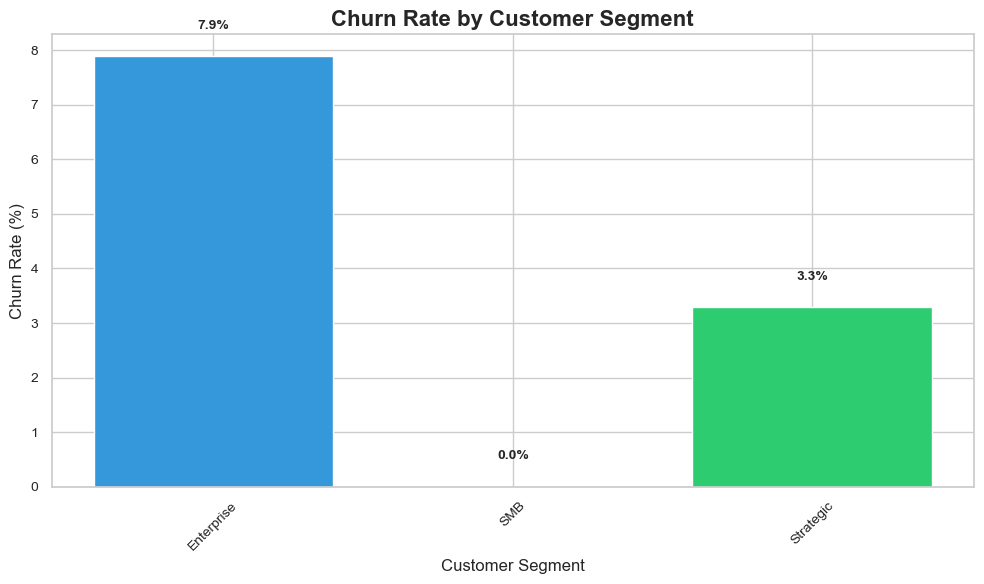

In [37]:
# Ensure that the 'Churned' column is correctly created before calculating segment churn
# Re-create the retention_analysis DataFrame
retention_analysis = df.groupby(['Segment', 'Customer ID'])['Order Date'].max().reset_index()
retention_analysis['Churned'] = retention_analysis['Order Date'] < churn_threshold

# Group by 'Segment' and calculate churn rate
segment_churn = retention_analysis.groupby('Segment')['Churned'].mean() * 100

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']  

# Plot the bar chart for segment churn rates with updated style and colors
plt.figure(figsize=(10, 6))
plt.bar(segment_churn.index, segment_churn, color=colors[:len(segment_churn)])
plt.title('Churn Rate by Customer Segment', fontsize=16, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding value labels on top of each bar
for index, value in enumerate(segment_churn):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


**INSIGHT**
- The Enterprise segment has the highest churn rate, around 8%. This indicates that most customers in this segment either do not renew their subscription or discontinue their engagement.
- The Strategic segment has a moderate churn rate, around 3.3%, indicating better retention than the Enterprise segment, but still needs improvement.
- The SMB (Small and Medium Business) segment shows a churn rate of 0%, indicating excellent retention and likely satisfaction among this customer group.

## **4.1 `Conclusions`**

Based on a series of analyzes that have been carried out, there are several important insights that can help SaaS companies in making strategic decisions:

1. **Providing Discounts and Profitability:**
   - Even though the number of transactions with discounts is higher, the profitability per transaction without discounts tends to be higher, with much higher median profits from transactions without discounts. This shows the importance of considering the impact of discounts on a company's profitability.
   - There is an optimal point for giving discounts for each transaction, namely at a discount figure >= 20% so that company profitability is maintained (positive) 
   - Discounts above the optimal point (>20%) can have a negative impact on the company's profitability, so companies need to be careful in determining discount strategies so as not to reduce profits significantly.

2. **Sales and Profit Patterns:**
   - There are monthly fluctuations in sales and profits, with consistent increases from year to year.
   - There is a Peak Season pattern every March, September, November and December 
   - The correlation between sales and profits shows that increasing sales is not always followed by a proportional increase in profits, which indicates the need for further evaluation of operational efficiency and pricing strategies.

3. **Product Performance**
   - The sales performance of the products sold by the company is quite efficient in generating positive profits relative to its sales, because most products have a profit margin above 10%,
   - `ContactMatcher`, `Support`, and `FinanceHub` products are the most popular products in each region (AMER, APJ, and EMEA) based on the number of orders. This may indicate that these products are in high demand or provide significant benefits to customers in that region.

4. **Churn Rate**
   - Enterprise segment customers have the highest risk of churn, which may indicate challenges in meeting their needs or expectations. 
   - Strategic Segment customers show better retention performance, but there is still room for improvement. 
   - SMB Segment customers appear stable with excellent retention.

## **4.2 `Recommendation`**

The following are recommendations that can be given to companies:
- Companies can provide discounts to customers according to the optimal point (<= 20%) so that profitability is well maintained,
- Providing promos during March, September, November and December (Peak season), 
- Prioritize customers who make a significant contribution to sales and profits, and carry out in-depth evaluations of products with negative margins to increase efficiency and profitability.
- Pay attention to giving discounts in each transaction, so that there is no imbalance between sales and profits obtained
- Companies can provide product market strategies that are most needed per region with products that have the most profitable profit margins
- Implement targeted retention plans for Enterprise customers, including personalized support, improved onboarding processes, and solutions tailored to their complex needs.
- Offer flexible contract options or loyalty programs to encourage long-term commitment.
- Strengthen engagement with the Strategic segment through additional services and regular interactions to ensure satisfaction and reduce the potential for future churn.
- Use insights from the success of the SMB segment to apply to other segments.

    By understanding patterns and trends from the analyzed data, companies can optimize marketing, pricing and discount strategies to achieve a good balance between increasing sales and profitability, as well as strengthening market positions in each region.